# Assignment 5 - Web Scraping

## Digital Humanities 140

### Varsha Hunter

### Making a List of all the CORGIS datasets


In [ ]:
import requests

In [ ]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [7]:
from bs4 import BeautifulSoup 

In [9]:
# Saving all the html in a string variable 
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

In [21]:
# Initializing our List
corgis_list = []

# Creating a List of all the CORGIs datasets
for i in document.find_all('h3'):
    corgis_list.append(i.text)

In [23]:
print(corgis_list)

['Aids', 'Airlines', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Construction Permits', 'Construction Spending', 'County Demographics', 'Covid', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Music', 'Opioids', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Supreme Court', 'Tate', 'Video Games', 'Weather', 'Wind Turbines']


### Scraping for all CORGIs datasets

In [58]:
import pandas as pd

In [79]:
def pdcorgis(a):
    # Navigating to Webpage 
    html_link = 'https://corgis-edu.github.io/corgis/csv/' + a.lower().replace(' ', '_')
    
    # Finding Download Link 
    response = requests.get(html_link)
    html_string = response.text
    document = BeautifulSoup(html_string, 'html.parser')
    for i in document.find_all('a'):
        if i.has_attr('download') == True:
            download_link = html_link + '/' + i['href']
            corgis_df = pd.read_csv(download_link)
            return(corgis_df)
        
    
    
    
    

In [80]:
pdcorgis(corgis_list[0])

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,Venezuela (Bolivarian Republic of),2020,39000,3900,4200,500,2500,1400,0.5,0.1,...,1000,500,2200,1900,0.09,100000,60000,40000,3300,99000
2755,Viet Nam,2020,83000,3700,3800,100,1000,2900,0.3,0.1,...,2000,500,6100,5900,0.08,250000,160000,80000,4300,240000
2756,Yemen,2020,5500,500,500,100,100,200,0.1,0.1,...,500,100,1100,1000,0.05,11000,6300,3700,1000,10000
2757,Zambia,2020,700000,19000,24000,5300,10000,8700,11.1,2.3,...,39000,8300,69000,61000,6.07,1500000,520000,850000,82000,1400000


### Creating Visualizations

In [103]:
import matplotlib.pyplot as plt

#### Histogram: Electricity Dataset


In [114]:
# Loading the Dataframe
electricity_df = pdcorgis(corgis_list[15])
electricity_df.head()

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,34,City of Abbeville - (SC),SC,Municipal,13.7,10.8,7000.0,59000.0,0.0,66000.0,...,460.0,0.0,0.0,0.0,0.0,0.0,0.0,7536.0,58000.0,3844.0
1,55,City of Aberdeen - (MS),MS,Municipal,32.4,30.3,0.0,209454.0,0.0,209454.0,...,662.0,5638.0,120537.0,1.0,0.0,0.0,0.0,14797.0,204261.0,3229.0
2,59,City of Abbeville - (LA),LA,Municipal,28.9,22.0,0.0,137264.0,0.0,137264.0,...,887.0,3011.1,35881.0,27.0,0.0,0.0,0.0,12383.0,127579.0,5494.0
3,84,A & N Electric Coop,VA,Cooperative,154.0,162.4,596.0,743457.0,0.0,744053.0,...,4227.0,15516.0,176162.0,8.0,0.0,0.0,0.0,78507.0,704010.0,35934.0
4,87,City of Ada - (MN),MN,Municipal,2.1,2.2,0.0,20028.0,0.0,20028.0,...,255.0,190.0,2615.0,58.0,0.0,0.0,0.0,1593.0,20028.0,1185.0


Text(0.5, 1.0, 'Distribution of Electric Utility Types')

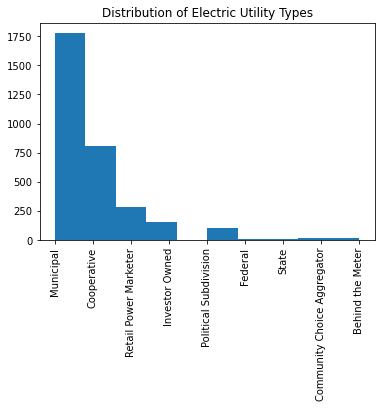

In [115]:
plt.hist(electricity_df['Utility.Type'])
plt.xticks(rotation=90)
plt.title('Distribution of Electric Utility Types')

#### Bar Chart: Hospitals Dataset

In [191]:
# Loading the Dataframe
hospitals_df = pdcorgis(corgis_list[24])
hospitals_df.head()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


Text(0.5, 1.0, 'Hospitals and their Average Ratings')

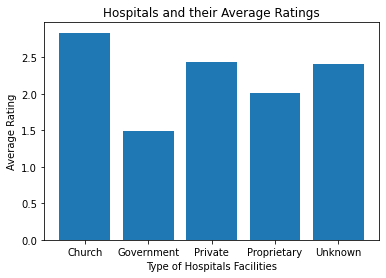

In [194]:
hosp_avgs = hospitals_df.groupby('Facility.Type').mean()
facility_types = list(hosp_avgs.index)
facility_ratings = avg_ratings['Rating.Overall'].to_list()

plt.bar(facility_types, facility_ratings)
plt.xlabel('Type of Hospitals Facilities')
plt.ylabel('Average Rating')
plt.title('Hospitals and their Average Ratings')


#### Line Plot: Music Dataset

In [205]:
music_df = pdcorgis(corgis_list[30])
music_df.head()



,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


In [254]:
avg_musics = music_df.groupby('song.time_signature').mean()
avg_tempo = list(avg_musics['song.tempo'])
timesigs = list(avg_musics.index)


Text(0.5, 1.0, 'Music Time Signature vs. Avg Tempo')

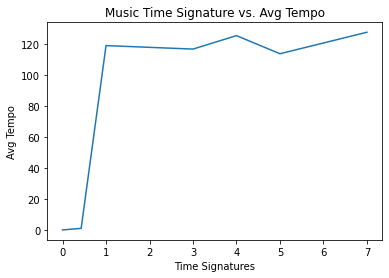

In [257]:
plt.plot(timesigs, avg_tempo)
plt.xlabel('Time Signatures')
plt.ylabel('Avg Tempo')
plt.title('Music Time Signature vs. Avg Tempo')